In [1]:
import pandas as pd

C:\Users\SHREYAS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas_datareader as web
import datetime as dt

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [6]:
company = '005930.KS'

In [7]:
start = dt.datetime(2015,1,1)
end = dt.datetime(2022,1,1)

In [8]:
import yfinance as yf
# Fetch the data
data = yf.download(company, start=start, end=end)
print('Company = Samsung Electronics')
print(data.head())

[*********************100%%**********************]  1 of 1 completed

Company = Samsung Electronics
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2015-01-02  26800.0  26800.0  26540.0  26600.0  21257.929688   8774950
2015-01-05  26720.0  26720.0  26260.0  26660.0  21305.880859  10139500
2015-01-06  26300.0  26340.0  25760.0  25900.0  20698.509766  15235500
2015-01-07  25880.0  26220.0  25640.0  26140.0  20890.314453  14322750
2015-01-08  26780.0  26780.0  26200.0  26280.0  21002.199219  14477600


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

In [11]:
prediction_days = 60

In [12]:
x_train=[]
y_train=[]

In [13]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
#building the model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1)) 
#prediction of next closing value

C:\Users\SHREYAS\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0471
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0033
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0027
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0035
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0024
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0024
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0026
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0037
Epoch 9/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0027
Epoch 10/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0024
Epoch 11/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0025
Epoch 12/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0021
Epoch 13/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0020
Epoch 14/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0020
Epoch 15/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0020
Epo

In [18]:
test_start = dt.datetime(2022,1,1)
test_end = dt.datetime(2024,1,1)

In [19]:
test_data = yf.download(company, start=test_start, end=test_end)

[*********************100%%**********************]  1 of 1 completed


In [20]:
test_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,74894.867188,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,73657.734375,25470640
2022-01-06,76700.0,77600.0,76600.0,76900.0,73181.921875,12931954
2022-01-07,78100.0,78400.0,77400.0,78300.0,74514.218750,15163757
2022-01-10,78100.0,78100.0,77100.0,78000.0,74228.718750,9947422


In [22]:
actual_prices = test_data["Close"].values

In [23]:
total_dataset = pd.concat((data["Close"], test_data["Close"]), axis=0 )

In [25]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

In [26]:
model_inputs = model_inputs.reshape(-1, 1)

In [27]:
model_inputs = scaler.transform(model_inputs)

In [29]:
#make the prediction

In [30]:
x_test = []

In [31]:
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [32]:
x_test = np.array(x_test)

In [33]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
predicted_prices = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [36]:
predicted_prices = scaler.inverse_transform(predicted_prices)

In [37]:
#plot the test prediction

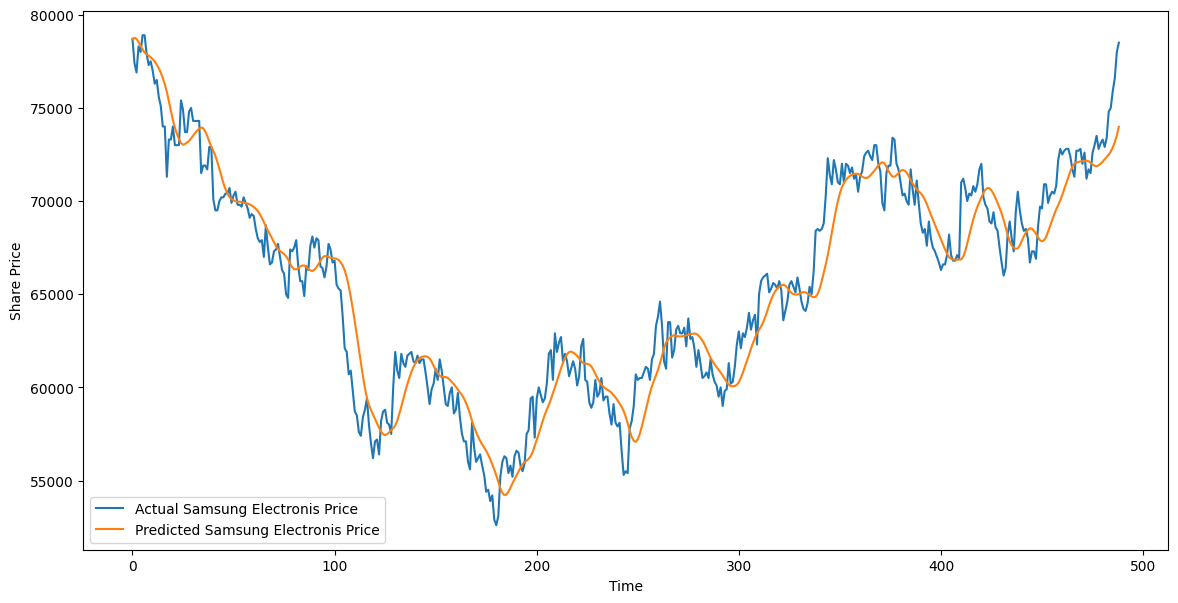

In [48]:
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label="Actual Samsung Electronis Price")
plt.plot(predicted_prices, label="Predicted Samsung Electronis Price")
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.legend()
plt.show()

In [49]:
#predicting next day

In [50]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days : len(model_inputs+1), 0]]

In [51]:
real_data = np.array(real_data)

In [52]:
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [53]:
prediction = model.predict(real_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


In [54]:
prediction = scaler.inverse_transform(prediction)

In [56]:
print(f"Prediction : {prediction}")

Prediction : [[74531.06]]
